In [1]:
import pandas as pd
import numpy as np
import utm
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Crime Data
crime = pd.read_csv('crime_csv_all_years.csv',header = 0, parse_dates=[1])

In [3]:
#crime.info()

In [4]:
#crime.head(20)

Cleaning the data. Excluding columns that will not be used in analysis. Puting data in correct formate.

In [5]:
#crime.types()

In [6]:
#EXclude Hundered_BLock
crime.drop(['HUNDRED_BLOCK'],axis =1, inplace = True)

In [7]:
#Excluded Minute
crime.drop(['MINUTE'], axis = 1, inplace=True)
#crime.head()

In [8]:
#Change formating of year
crime['YEAR'] = pd.to_datetime(crime['YEAR'], format='%Y').dt.year
#crime.dtypes

The year 2018 will be excluded from analysis since there is still 5 months left in the year

In [9]:
crime = crime[crime['YEAR'] != 2018]
#crime.head()
#crime.info()

In [10]:
#HOUR, MINUTE, HUNDRED_BLOCK and NEIGHBOURHOOD are missing data. Exclude from analysis
#crime['HOUR'].fillna('N/A', inplace = True)
#crime['NEIGHBOURHOOD'].fillna('N/A', inplace = True)
crime.dropna()
#crime.info()

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD,X,Y
0,Theft from Vehicle,2003,10,6,9.0,Sunset,493059.11,5450912.60
1,Theft from Vehicle,2003,5,30,7.0,Grandview-Woodland,495033.26,5458722.97
2,Theft from Vehicle,2003,2,2,16.0,Grandview-Woodland,495033.26,5458722.97
3,Theft from Vehicle,2003,4,8,13.0,West End,491034.25,5459231.00
4,Break and Enter Residential/Other,2003,12,15,13.0,West End,490440.32,5458486.96
6,Mischief,2003,3,8,9.0,Grandview-Woodland,494933.69,5457116.79
7,Theft from Vehicle,2003,5,5,7.0,Strathcona,493347.61,5458719.85
8,Theft from Vehicle,2003,2,23,20.0,Strathcona,493660.68,5458707.89
10,Theft from Vehicle,2003,8,15,21.0,Strathcona,493660.68,5458707.89
11,Break and Enter Residential/Other,2003,7,8,7.0,West End,490440.32,5458486.96


In [11]:
# convert it to a datetime data type
crime['DATE'] = pd.to_datetime({'YEAR':crime['YEAR'], 'MONTH':crime['MONTH'], 'DAY':crime['DAY']})
#crime.head()

In [12]:
#Create Day of Week column for analysis (Monday=0 to Sunday=6)
crime['DAY_WK'] = crime['DATE'].dt.dayofweek

In [13]:
#crime.head()

In [14]:
# Types of crime 
#crime['TYPE'].value_counts().sort_index()

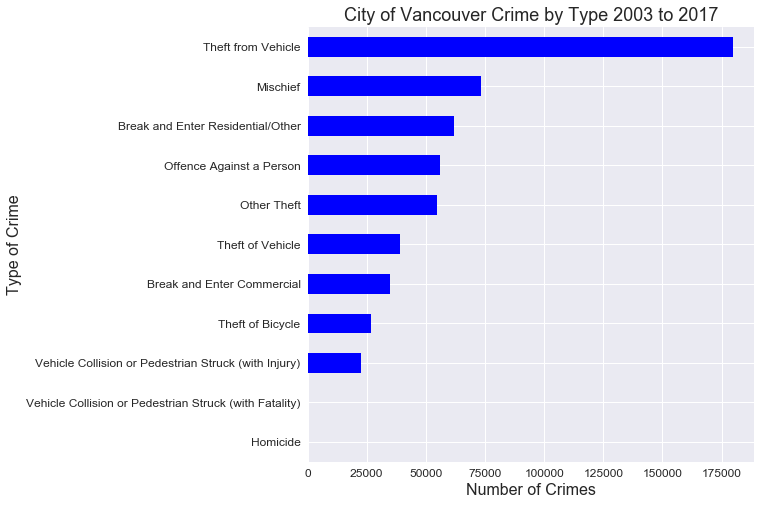

In [15]:
# Plot a Bar graph of the data 

sns.set(style = 'darkgrid')
plt.figure(figsize=(8,8))
allcrime = crime.groupby(crime['TYPE']).size().sort_values(ascending=True)
allcrime.plot(kind='barh', color ='b')
plt.title('City of Vancouver Crime by Type 2003 to 2017', size =18)
plt.ylabel('Type of Crime', size =16)
plt.xlabel('Number of Crimes',size =16, wrap=True)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.savefig('TotalCrimebyType.png')
plt.show()

In [16]:
# Has the rate of vehicle offenses changed over the years
yearly_crime=crime.groupby([crime["YEAR"]]).size().to_frame().reset_index().rename(columns={0:"Count"})
#yearly_crime.head()

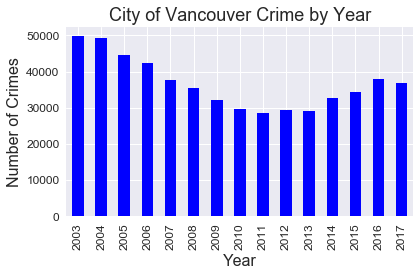

In [17]:
plt.figure(figsize =(8,10)) 
yearly_crime.plot(kind = "bar", x=['YEAR'], y = "Count",color = "blue", linewidth = 8, legend = False)
plt.title('City of Vancouver Crime by Year', size =18)
plt.ylabel('Number of Crimes', size =16)
plt.xlabel('Year',size =16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.tight_layout()
plt.savefig('TotalCrimebyYear.png',dpi=100,alpha=True)
plt.show()

The focus of the analysis will be theft from vehicle since it is the most frequent type of crime. 

In [18]:
# Interested only in Theft from Vehicle
crime = crime[crime['TYPE']=='Theft from Vehicle']
#crime.head()


In [19]:
#crime.info()

X and Y coordinates are in UTM 10 WGS84 formate (X: Easting, Y Northing)(NOTE: cannot have rows with zero)
This will be useful in prediction analysis

In [20]:
#Convert x and Y coordinates to Lon & Lat 
#Adapted from: http://www.worthandlung.de/pandas/Converting-e32-n32-to-lat-long.html
def getUTMs(row):
    tup = utm.to_latlon(row.ix[0],row.ix[1], 10, 'U')
    return pd.Series(tup[:2])

In [21]:
crime[['LAT','LONG']] = crime[['X','Y']].apply(getUTMs , axis=1)
crime.head()

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD,X,Y,DATE,DAY_WK,LAT,LONG
0,Theft from Vehicle,2003,10,6,9.0,Sunset,493059.11,5450912.60,2003-10-06,0,49.210965,-123.095299
1,Theft from Vehicle,2003,5,30,7.0,Grandview-Woodland,495033.26,5458722.97,2003-05-30,4,49.281241,-123.068290
2,Theft from Vehicle,2003,2,2,16.0,Grandview-Woodland,495033.26,5458722.97,2003-02-02,6,49.281241,-123.068290
3,Theft from Vehicle,2003,4,8,13.0,West End,491034.25,5459231.00,2003-04-08,1,49.285765,-123.123286
7,Theft from Vehicle,2003,5,5,7.0,Strathcona,493347.61,5458719.85,2003-05-05,0,49.281196,-123.091467


Data is now ready for analysis. Export to crime.csv

In [22]:
crime.to_csv('crime.csv', index =False)